# Introduction

This notebook demonstrates a **minimal Feed-Forward Neural Network (FFN)** using Keras to learn a simple regression task: \( y = 2x + 1 \). We will:

- **Generate** a small dataset.
- **Build** a single-layer network (`Dense` layer).
- **Train** the model and track its loss over epochs.
- **Visualize** how the model’s predictions evolve during training.
- **Evaluate** the model by predicting on a new input.

By the end, you’ll see how a basic neural network in Keras adjusts its parameters to fit a simple function.

# Function Description

In this notebook, our model is trained to learn the function \( y = 2x + 1 \). This is a straightforward **linear** function with:
- **Slope (2)**: Determines how steeply \( y \) increases with respect to \( x \).
- **Y-intercept (1)**: The point where the line crosses the \( y \)-axis.

We provide several data points on this line, for example:
- \((1, 3)\)   →   \(3 = 2 * 1 + 1\)
- \((2, 5)\)   →   \(5 = 2 * 2 + 1\)
- \((3, 7)\)   →   \(7 = 2 * 3 + 1\)

During training, the neural network **adjusts its internal weights and biases** to fit this mapping. By the end, the model should approximate the function well enough that, given a new input (e.g., \( x = 6 \)), it outputs a value close to \( 13 \) (since \( 2 * 6 + 1 = 13 \)).

This simple example demonstrates how a basic feed-forward network can learn to replicate a **linear relationship** from a small set of data points.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
# 1. Prepare the Data
#    We're using a simple dataset: y = 2x + 1
X = np.array([[1.0], [2.0], [3.0], [4.0], [5.0]], dtype=np.float32)
y = np.array([[3.0], [5.0], [7.0], [9.0], [11.0]], dtype=np.float32)

In [14]:
# 2. Build the Model
#    A simple feed-forward network with one Dense layer (linear output).
model = Sequential([
    Dense(units=1, input_shape=(1,))  # 1 input feature -> 1 output
])

In [15]:
# 3. Compile the Model
model.compile(
    loss='mean_squared_error',
    optimizer=SGD(learning_rate=0.01)
)

In [16]:
# A list to store predictions after each epoch
predictions_over_epochs = []

# 4. Create a Custom Callback to Store Predictions
class StorePredictions(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Get predictions for our training inputs
        preds = model.predict(X)
        # Store a copy of the predictions
        predictions_over_epochs.append(preds.flatten())

In [17]:
# 5. Train the Model
history = model.fit(
    X, y,
    epochs=100,
    verbose=0,
    callbacks=[StorePredictions()]
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

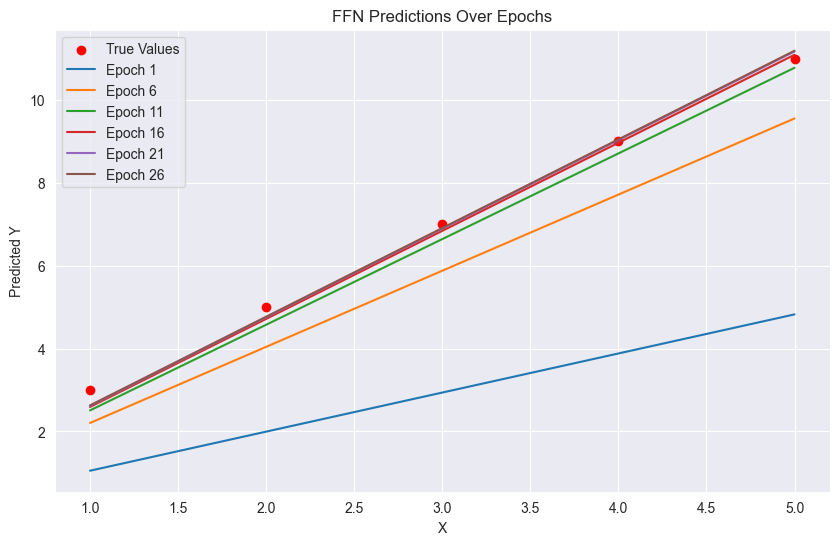

In [18]:
# 6. Plotting
#    We'll plot the true values (red dots) and the predictions at
#    a few chosen epochs (e.g., every 10 epochs).
plt.figure(figsize=(10, 6))

# Plot the true data points
plt.scatter(X, y, color='red', label='True Values')

# Plot predictions for every 5th epoch
selected_epochs = range(0, 30, 5)
for i in selected_epochs:
    preds = predictions_over_epochs[i]
    # Plot the predictions as a line
    plt.plot(X, preds, label=f'Epoch {i+1}')

plt.title('FFN Predictions Over Epochs')
plt.xlabel('X')
plt.ylabel('Predicted Y')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# 7. Final Prediction for a New Input
test_input = np.array([[6.0]], dtype=np.float32)
predicted_score = model.predict(test_input)
print(f"Predicted score for input [6.0]: {predicted_score[0,0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted score for input [6.0]: 13.2644
